<a href="https://colab.research.google.com/github/2403a54123-web/NLP/blob/main/NLP_LabAss_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud

import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
import pandas as pd

data = {
    'tweet': [
        "I hate this phone, worst experience ever!",
        "This service is terrible and slow",
        "I am very disappointed with the product",
        "Absolutely love this! Amazing experience",
        "Great service and friendly staff"
    ],
    'sentiment': ['negative', 'negative', 'negative', 'positive', 'positive']
}

df = pd.DataFrame(data)

def preprocess_tweet(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove mentions and hashtags
    text = re.sub(r'@\w+|#\w+', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text).lower()
    # Tokenize the text
    tokens = word_tokenize(text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [word for word in tokens if word not in stop_words]
    # Join the remaining words back into a string
    return ' '.join(cleaned_tokens)

df['cleaned_tweet'] = df['tweet'].apply(preprocess_tweet)
df.head()

,tweet,sentiment,cleaned_tweet
0,"I hate this phone, worst experience ever!",negative,hate phone worst experience ever
1,This service is terrible and slow,negative,service terrible slow
2,I am very disappointed with the product,negative,disappointed product
3,Absolutely love this! Amazing experience,positive,absolutely love amazing experience
4,Great service and friendly staff,positive,great service friendly staff


In [ ]:
tfidf_vectorizer = TfidfVectorizer()
negative_tweets = df[df['sentiment'] == 'negative']
tfidf_matrix_negative = tfidf_vectorizer.fit_transform(negative_tweets['cleaned_tweet'])
feature_names_negative = tfidf_vectorizer.get_feature_names_out()

print("Shape of TF-IDF matrix for negative tweets:", tfidf_matrix_negative.shape)
print("Number of feature names (vocabulary) for negative tweets:", len(feature_names_negative))

Shape of TF-IDF matrix for negative tweets: (3, 10)
Number of feature names (vocabulary) for negative tweets: 10


In [ ]:
sums = tfidf_matrix_negative.sum(axis=0).A1
tfidf_scores = pd.DataFrame({'term': feature_names_negative, 'score': sums})
tfidf_scores = tfidf_scores.sort_values(by='score', ascending=False)

top_n_terms = 20
top_tfidf_terms = tfidf_scores.head(top_n_terms)
print("Top 20 TF-IDF terms for negative tweets:")
print(top_tfidf_terms)


Top 20 TF-IDF terms for negative tweets:
           term     score
0  disappointed  0.707107
5       product  0.707107
7          slow  0.577350
8      terrible  0.577350
6       service  0.577350
1          ever  0.447214
4         phone  0.447214
3          hate  0.447214
2    experience  0.447214
9         worst  0.447214


/tmp/ipython-input-1062517079.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='score', y='term', data=top_tfidf_terms, palette='viridis')


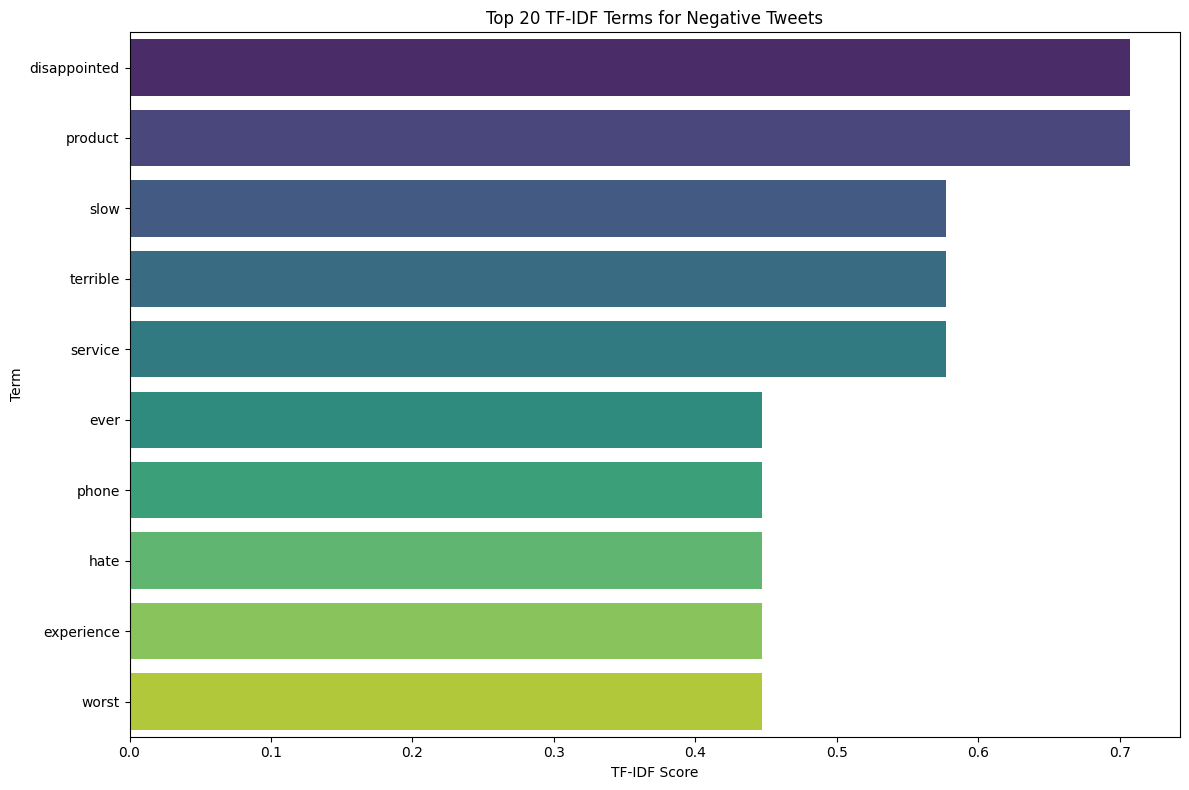

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='term', data=top_tfidf_terms, palette='viridis')
plt.title('Top 20 TF-IDF Terms for Negative Tweets')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.tight_layout()
plt.show()

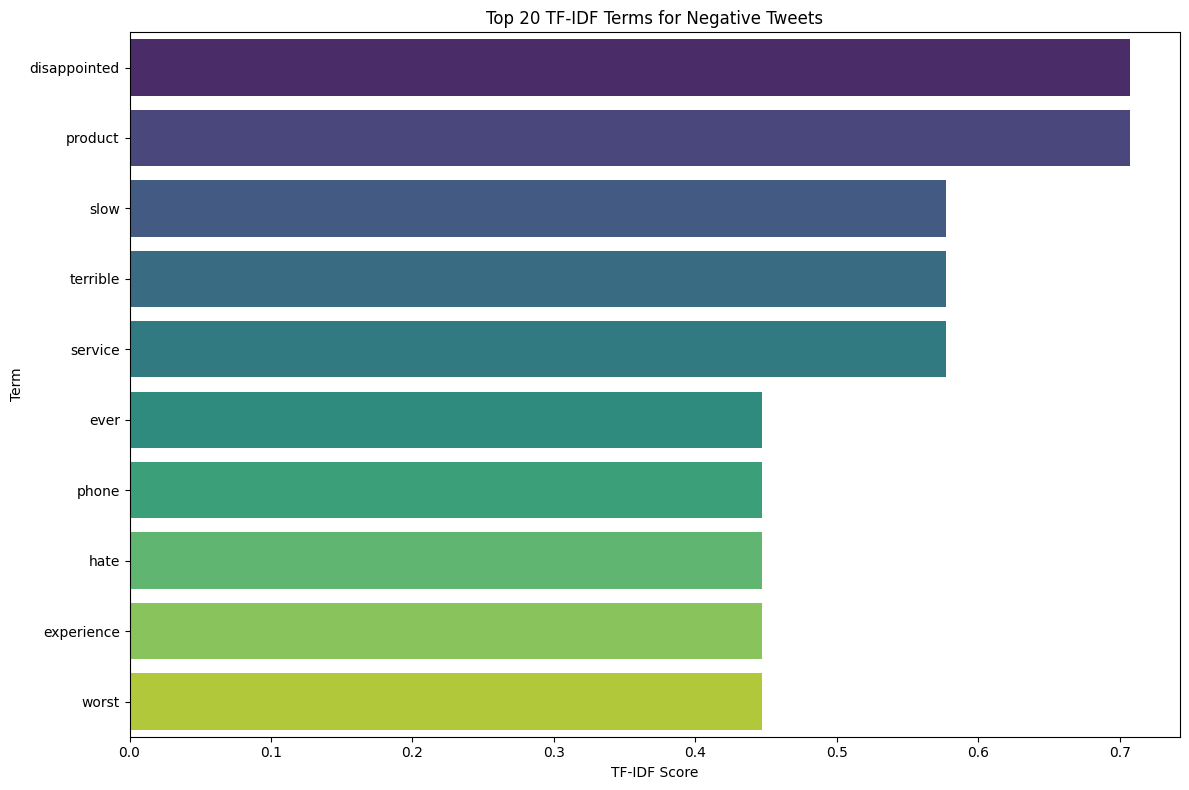

In [ ]:
plt.figure(figsize=(12, 8))
sns.barplot(x='score', y='term', data=top_tfidf_terms, hue='term', palette='viridis', legend=False)
plt.title('Top 20 TF-IDF Terms for Negative Tweets')
plt.xlabel('TF-IDF Score')
plt.ylabel('Term')
plt.tight_layout()
plt.show()



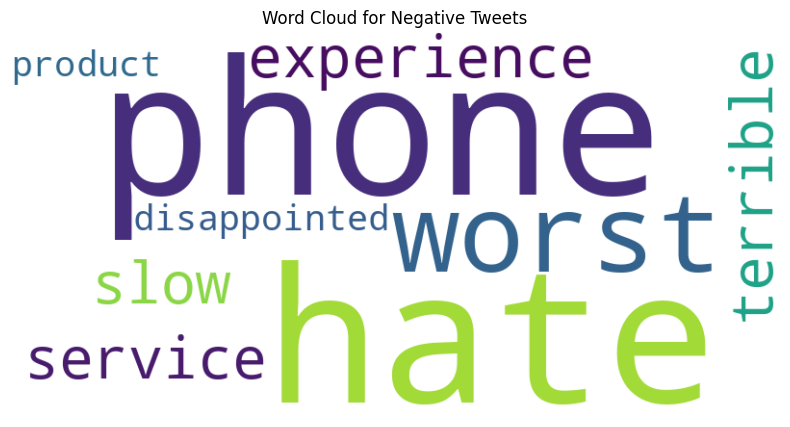

In [ ]:
all_negative_words = ' '.join([tweet for tweet in negative_tweets['cleaned_tweet']])

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_negative_words)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Tweets')
plt.show()
